In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
# 相関関係、多重共線性
df = pd.read_csv('./regression_pls.csv')
df.head()

,Target,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x187,x188,x189,x190,x191,x192,x193,x194,x195,x196
0,1.58,59.068,54.028,59.037114,24,0,0.213790,-0.369921,0.369921,0.213790,...,0,0,0,0,0,0,0,0,0,0
1,1.34,46.073,40.025,46.053098,20,0,-0.001725,-0.271722,0.271722,0.001725,...,0,0,0,0,0,0,0,0,0,0
2,1.22,60.052,56.020,60.021129,24,0,0.299685,-0.481433,0.481433,0.299685,...,0,0,0,0,0,0,0,0,0,0
3,1.15,71.123,62.051,71.073499,30,0,-0.004845,-0.316731,0.316731,0.004845,...,0,0,0,0,0,0,0,0,0,0
4,1.12,76.055,72.023,76.027277,30,0,0.335391,-0.349891,0.349891,0.335391,...,0,0,0,0,0,0,0,0,0,1


In [2]:
df.shape

(1290, 197)

In [3]:
t = df['Target'].values
x = df.drop('Target', axis=1).values


In [4]:
t.shape 

(1290,)

In [5]:
x.shape

(1290, 196)

In [6]:
# 学習用データとテスト用データに分ける。
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=0)

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [8]:
model.fit(x_train, t_train)


LinearRegression()

In [9]:
# 決定係数の最大値１　１に近いほど良い
print(f'train score: {model.score(x_train, t_train)}')
print(f'test score: {model.score(x_test, t_test)}  ')
# 相関関係の高い説明変数を見つけるか使うモデルを変えるか変えるか。


train score: 0.9365473869097838
test score: -0.020168921810233664  


In [10]:
# corr 相関係数を出す関数。
df_corr = df.corr()

<AxesSubplot:>

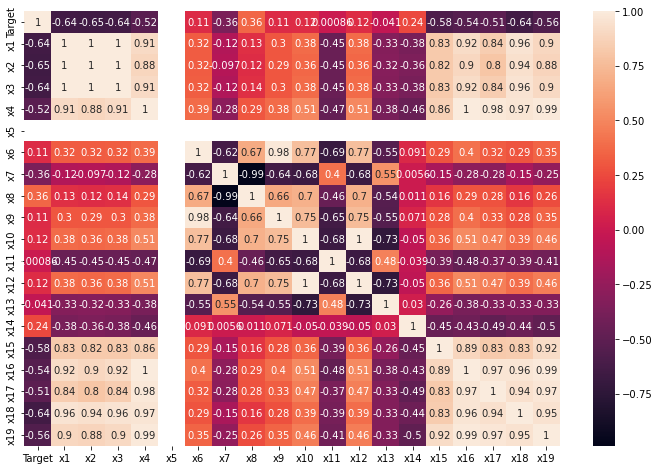

In [11]:
# ヒートマットを使う。　seaborn ：わかりやすく可視化することができる。

plt.figure(figsize=(12, 8 ))
sns.heatmap(df_corr.iloc[:20, :20], annot=True)

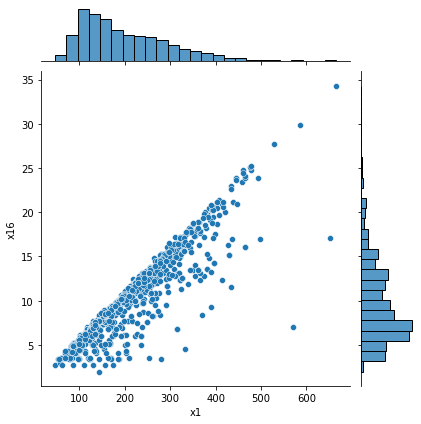

In [12]:
# 相関係数が高い場所を確認する
sns.jointplot(x='x1', y='x16', data=df)

In [13]:
# PLS  入力値x　から主成分Tに変換する（情報tのも組み込んで）
from sklearn.cross_decomposition import PLSRegression


In [14]:
# PLS:部分的最小２乗法(Partial Least Squares Regression)は、PLSと略されます。
# または、PLSRやPLS回帰とも呼ばれます。


pls = PLSRegression(n_components=11)
pls.fit(x_train, t_train)

print(f'train score: {pls.score(x_train, t_train)}')
print(f'test score: {pls.score(x_test, t_test)}  ')
# 多重共線性を考慮

train score: 0.9157705245807128
test score: 0.8839475118318949  
